# Channel Map Plots

Here is a demonstration how to plot channel maps with `imfits`.

The third axis is  FREQ
Convert frequency to velocity
Draw channel maps...


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


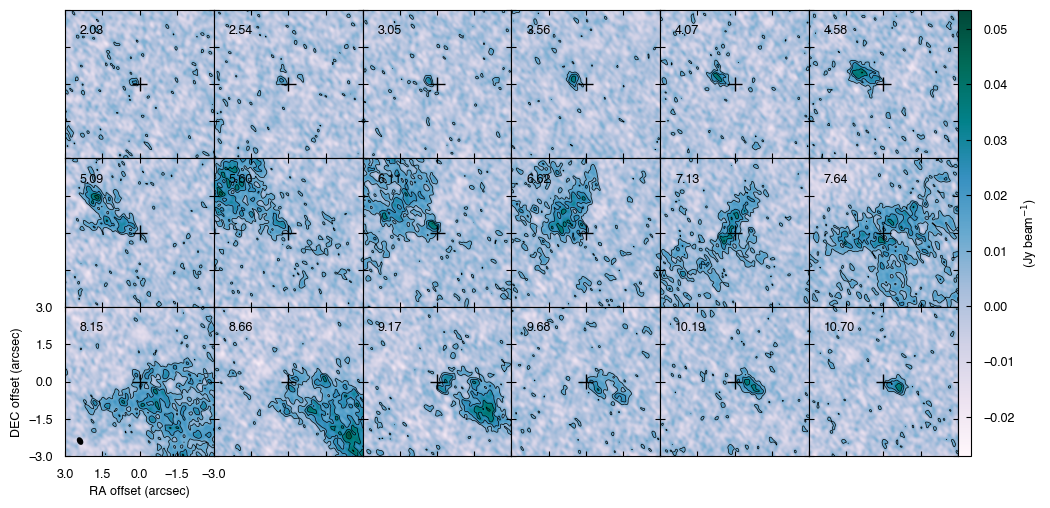

In [1]:
# import modules
import numpy as np
# if path is not set
#import sys
#sys.path.append('/PATH/TO/imfits')

from imfits import Imfits
from imfits.drawmaps import AstroCanvas


# read cube
f = 'l1489.c18o.contsub.gain01.rbp05.mlt100.cf15.pbcor.croped.fits'
cube = Imfits(f)


# plot
canvas = AstroCanvas((3,6),
                     (0.0, 0.0), # padding between panels
                     cbar_mode = 'single',
                     pltconfig = {'font.size': 9},
                     imagegrid=True) # use ImageGrid of matplotlib for a better panel spacing.
canvas.channelmaps(cube, 
                   imscale = [-3, 3, -3, 3], # from -3'' to 3''
                   velmin=2., velmax=13, # minimum and maximum velocities
                   nskip=3, # step of channel skipping
                   xticks = np.arange(3, -3.1, -1.5),
                   yticks = np.arange(-3, 3.1, 1.5),
                   cbarlabel = r'(Jy beam$^{-1}$)',
                  )

#canvas.savefig('channelmaps', ext='pdf')
plt.show()

If you want to add a background image in every panel:

The third axis is  FREQ
Convert frequency to velocity


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Draw channel maps...


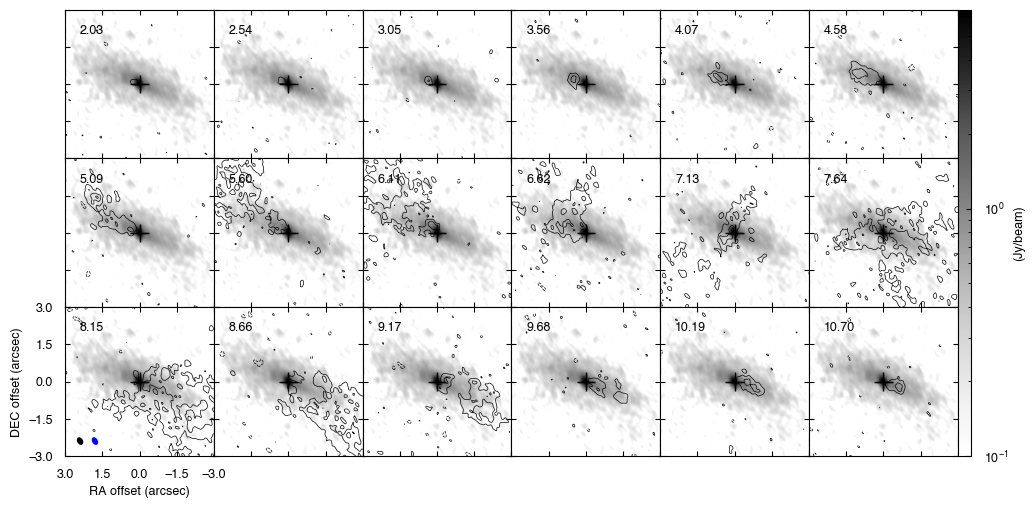

In [25]:
from imfits import drawmaps as dm

# read cube
f = 'l1489.c18o.contsub.gain01.rbp05.mlt100.cf15.pbcor.croped.fits'
cube = Imfits(f)
f_cont = 'l1489.b6.cont.gain01.rbp05.mlt100.cf15.selfcal.2nd.pbcor.croped.fits'
cont = Imfits(f_cont)
cont.data *= 1e3 # to mJy

# plot
canvas = AstroCanvas((3,6),
                     (0.0, 0.0), # padding between panels
                     cbar_mode = 'single',
                     pltconfig = {'font.size': 9},
                     imagegrid=True) # use ImageGrid of matplotlib for a better panel spacing.

# plot continuum in every panel as background
for i in range(canvas.naxes):
    canvas.intensitymap(cont, 
                        color = True, 
                        contour = False, 
                        cmap = 'Greys', 
                        color_norm = 'log', # in log scale
                        vmin = 1.e-1,
                        iaxis = i, # panel index
                        plot_beam = False,
                       )


# overlay channel maps with contours
canvas.channelmaps(cube, 
                   imscale = [-3, 3, -3, 3], # from -3'' to 3''
                   color = False,
                   contour = True,
                   clevels = np.array([-3,3,6,9,12,15]) * 5e-3,
                   velmin=2., velmax=13, # minimum and maximum velocities
                   nskip=3, # step of channel skipping
                   xticks = np.arange(3, -3.1, -1.5),
                   yticks = np.arange(-3, 3.1, 1.5),
                   cbarlabel = r'(Jy beam$^{-1}$)',
                  )

# optional
# add beam size of the continuum image
ax = canvas.ax_corner('bottom left') # call corner panel
dm.add_beam(ax, cont.beam[0], cont.beam[1], cont.beam[2],
           loc = (0.2, 0.1), bcolor = 'blue')

#canvas.savefig('channelmaps', ext='pdf')
plt.show()